### Tetracutinase Analysis

In [124]:
# Numeric operations
import numpy as np

# Visualization / Plotting
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

# Scientific image processing library:
import skimage
from skimage import io
from skimage import filters
from skimage.morphology import disk
from skimage.feature import blob_log
from skimage import data
from skimage import measure

from scipy.ndimage import gaussian_filter

# Ensure that images are rendered in this notebook:
%matplotlib inline

In [125]:
# Reading the image here:
# stem_image = io.imread('simulations/LLTO_800.tif')

In [138]:
def imread_convert(f):
    return io.imread(f).astype(np.uint8)/255

ic = io.ImageCollection('*.png', load_func=imread_convert)

In [141]:
pixel_size = [0.1,0.1]

### Add beam incoherence to the final simulated STEM

In [317]:
im_data = []
for ii in range(0,len(ic)):
    im_data.append(gaussian_filter(ic[ii],10))

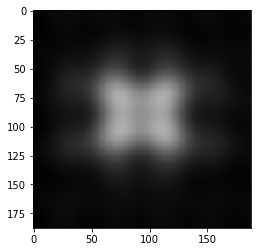

In [323]:
plt.imshow(im_data[12], cmap = 'gray', vmax = 0.8)

### Add noise to images

- Dose: integer value indicating the number of electrons per Angstrom squared illuminating the sample.
- pixel_size: Image pixel size in Angstrom.

In [247]:
def add_noise(img,dose,pixel_size):
    doseperpixel = dose*(pixel_size[0]*pixel_size[1])
    mnoise = np.random.poisson(doseperpixel*img)
        
    return mnoise

In [296]:
im13_1 =  add_noise(ic[13],1,pixel_size)
im13_10 =  add_noise(ic[13],10,pixel_size)
im13_100 =  add_noise(ic[13],100,pixel_size)
im13_f =  add_noise(ic[13],1000000,pixel_size)


im3_1 =  add_noise(ic[3],1,pixel_size)
im3_10 =  add_noise(ic[3],10,pixel_size)
im3_100 =  add_noise(ic[3],100,pixel_size)
im3_f =  add_noise(ic[3],1000000,pixel_size)

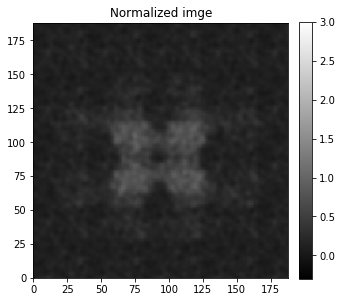

In [315]:
fig, axis = plt.subplots(figsize=(5, 5))
im_handle = axis.imshow(ic[12], cmap='gray', vmin=-0.3, vmax=3)
axis.set_xlim(left=0, right=im01_100.shape[0])
axis.set_ylim(bottom=0, top=im01_100.shape[1]);

# Add a colorbar
cbar = plt.colorbar(im_handle, ax=axis, fraction=0.046, pad=0.04)
axis.set_title('Normalized imge');

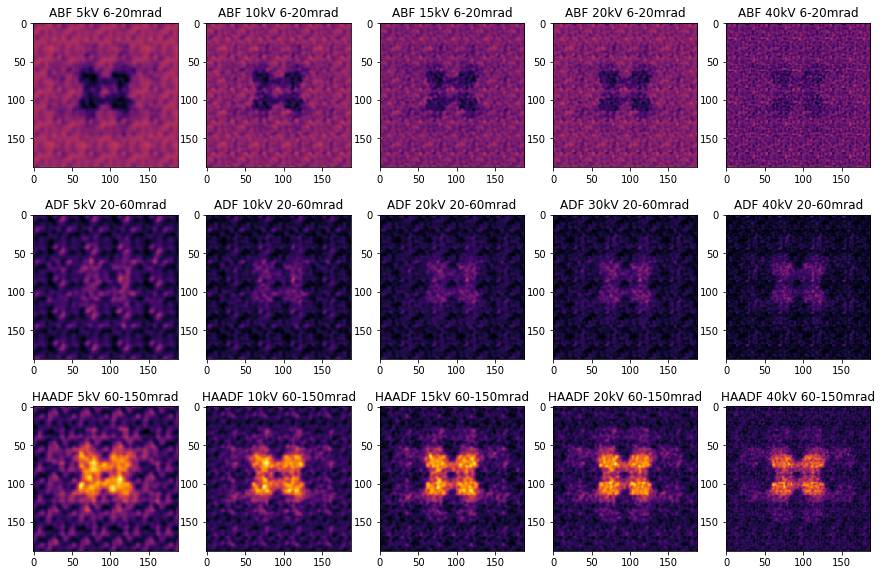

In [297]:
#-- Plot...
fig, axes = plt.subplots(figsize=(15, 10),ncols=5,nrows=3)

axes[0,0].imshow(ic[0], cmap='inferno', vmax = 2)
axes[0,0].axis('image')
axes[0,0].set_title('ABF 5kV 6-20mrad')

axes[0,1].imshow(ic[1], cmap='inferno',vmax = 2)
axes[0,1].axis('image')
axes[0,1].set_title('ABF 10kV 6-20mrad')

axes[0,2].imshow(ic[2], cmap='inferno',vmax = 2)
axes[0,2].axis('image')
axes[0,2].set_title('ABF 15kV 6-20mrad')

axes[0,3].imshow(ic[3], cmap='inferno',vmax = 2)
axes[0,3].axis('image')
axes[0,3].set_title('ABF 20kV 6-20mrad')

axes[0,4].imshow(ic[4], cmap='inferno',vmax = 2)
axes[0,4].axis('image')
axes[0,4].set_title('ABF 40kV 6-20mrad')

#row2
axes[1,0].imshow(ic[5], cmap='inferno',vmax = 2)
axes[1,0].axis('image')
axes[1,0].set_title('ADF 5kV 20-60mrad')

axes[1,1].imshow(ic[6], cmap='inferno',vmax = 2)
axes[1,1].axis('image')
axes[1,1].set_title('ADF 10kV 20-60mrad')

axes[1,2].imshow(ic[7], cmap='inferno',vmax = 2)
axes[1,2].axis('image')
axes[1,2].set_title('ADF 20kV 20-60mrad')

axes[1,3].imshow(ic[8], cmap='inferno',vmax = 2)
axes[1,3].axis('image')
axes[1,3].set_title('ADF 30kV 20-60mrad')

axes[1,4].imshow(ic[9], cmap='inferno',vmax = 2)
axes[1,4].axis('image')
axes[1,4].set_title('ADF 40kV 20-60mrad')

#Row 3
axes[2,0].imshow(ic[10], cmap='inferno',vmax = 1)
axes[2,0].axis('image')
axes[2,0].set_title('HAADF 5kV 60-150mrad')

axes[2,1].imshow(ic[11], cmap='inferno',vmax = 1)
axes[2,1].axis('image')
axes[2,1].set_title('HAADF 10kV 60-150mrad')

axes[2,2].imshow(ic[12], cmap='inferno',vmax = 1)
axes[2,2].axis('image')
axes[2,2].set_title('HAADF 15kV 60-150mrad')

axes[2,3].imshow(ic[13], cmap='inferno',vmax = 1)
axes[2,3].axis('image')
axes[2,3].set_title('HAADF 20kV 60-150mrad')

axes[2,4].imshow(ic[14], cmap='inferno',vmax = 1)
axes[2,4].axis('image')
axes[2,4].set_title('HAADF 40kV 60-150mrad')


plt.savefig('results/ABF_ADF_HAADF.png',dpi=300)
plt.show()

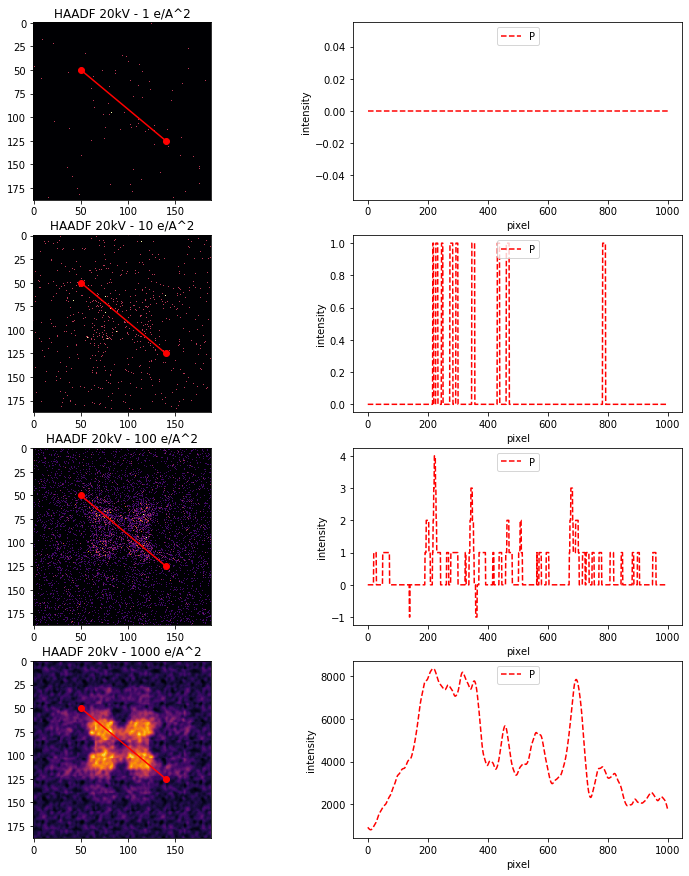

In [301]:
#-- Extract the line...
# Make a line with "num" points...
import scipy.ndimage
from skimage.measure import profile_line
from scipy import signal

x0, y0 = 50, 50 # These are in _pixel_ coordinates!!
x1, y1 = 140, 125
num = 1000
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

# Extract the values along the line, using cubic interpolation
z_1 = scipy.ndimage.map_coordinates(im13_1, np.vstack((x,y)))
z_10 = scipy.ndimage.map_coordinates(im13_10, np.vstack((x,y)))
z_100 = scipy.ndimage.map_coordinates(im13_100, np.vstack((x,y)))
z_f = scipy.ndimage.map_coordinates(im13_f, np.vstack((x,y)))


# y1 = signal.savgol_filter(z_1, 5, 3) # window size 51, polynomial order 3
# y10 = signal.savgol_filter(z_10, 5, 3) # window size 51, polynomial order 3
# y100 = signal.savgol_filter(z_100, 5, 3) # window size 51, polynomial order 3
# yf = signal.savgol_filter(z_f, 5, 3) # window size 51, polynomial order 3


#-- Plot...
fig, axes = plt.subplots(figsize=(13, 15),ncols=2,nrows=4)

axes[0,0].imshow(im13_1, cmap='inferno')
axes[0,0].plot([x0, x1], [y0, y1], 'ro-')
axes[0,0].axis('image')
axes[0,0].set_title('HAADF 20kV - 1 e/A^2')


axes[0,1].plot(z_1,'r--')
# axes[0,1].plot(y1,'k')
axes[0,1].legend(('Profile'),loc='upper center')
axes[0,1].set_xlabel('pixel')
axes[0,1].set_ylabel('intensity')


axes[1,0].imshow(im13_10, cmap='inferno')
axes[1,0].plot([x0, x1], [y0, y1], 'ro-')
axes[1,0].axis('image')
axes[1,0].set_title('HAADF 20kV - 10 e/A^2')

axes[1,1].plot(z_10,'r--')
# axes[1,1].plot(y10,'k')
axes[1,1].legend(('Profile'),loc='upper center')
axes[1,1].set_xlabel('pixel')
axes[1,1].set_ylabel('intensity')


axes[2,0].imshow(im13_100, cmap='inferno')
axes[2,0].plot([x0, x1], [y0, y1], 'ro-')
axes[2,0].axis('image')
axes[2,0].set_title('HAADF 20kV - 100 e/A^2')

axes[2,1].plot(z_100, 'r--')
# axes[2,1].plot(y100,'k')
axes[2,1].legend(('Profile'),loc='upper center')
axes[2,1].set_xlabel('pixel')
axes[2,1].set_ylabel('intensity')

axes[3,0].imshow(im13_f, cmap='inferno')
axes[3,0].plot([x0, x1], [y0, y1], 'ro-')
axes[3,0].axis('image')
axes[3,0].set_title('HAADF 20kV - 1000 e/A^2')

axes[3,1].plot(z_f, 'r--')
# axes[3,1].plot(yf,'k')
axes[3,1].legend(('Profile'),loc='upper center')
axes[3,1].set_xlabel('pixel')
axes[3,1].set_ylabel('intensity')


plt.savefig('results/HAADF 20kV_profile.png',dpi=300)
plt.show()

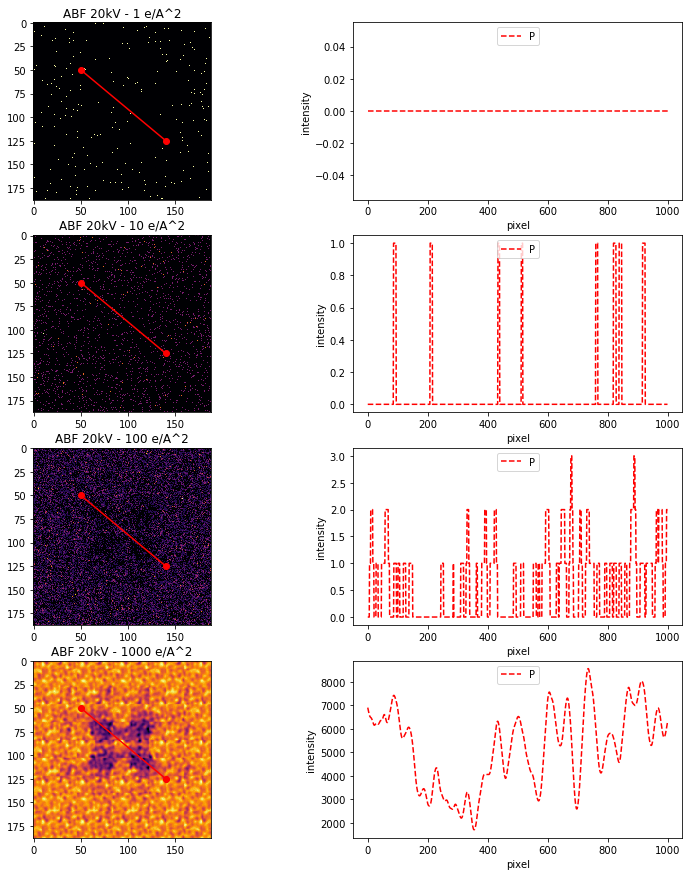

In [302]:
#-- Extract the line...
# Make a line with "num" points...
import scipy.ndimage
from skimage.measure import profile_line
from scipy import signal

x0, y0 = 50, 50 # These are in _pixel_ coordinates!!
x1, y1 = 140, 125
num = 1000
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

# Extract the values along the line, using cubic interpolation
z_31 = scipy.ndimage.map_coordinates(im3_1, np.vstack((x,y)))
z_310 = scipy.ndimage.map_coordinates(im3_10, np.vstack((x,y)))
z_3100 = scipy.ndimage.map_coordinates(im3_100, np.vstack((x,y)))
z_3f = scipy.ndimage.map_coordinates(im3_f, np.vstack((x,y)))


# y1 = signal.savgol_filter(z_1, 5, 3) # window size 51, polynomial order 3
# y10 = signal.savgol_filter(z_10, 5, 3) # window size 51, polynomial order 3
# y100 = signal.savgol_filter(z_100, 5, 3) # window size 51, polynomial order 3
# yf = signal.savgol_filter(z_f, 5, 3) # window size 51, polynomial order 3


#-- Plot...
fig, axes = plt.subplots(figsize=(13, 15),ncols=2,nrows=4)

axes[0,0].imshow(im3_1, cmap='inferno')
axes[0,0].plot([x0, x1], [y0, y1], 'ro-')
axes[0,0].axis('image')
axes[0,0].set_title('ABF 20kV - 1 e/A^2')


axes[0,1].plot(z_31,'r--')
# axes[0,1].plot(y1,'k')
axes[0,1].legend(('Profile'),loc='upper center')
axes[0,1].set_xlabel('pixel')
axes[0,1].set_ylabel('intensity')


axes[1,0].imshow(im3_10, cmap='inferno')
axes[1,0].plot([x0, x1], [y0, y1], 'ro-')
axes[1,0].axis('image')
axes[1,0].set_title('ABF 20kV - 10 e/A^2')

axes[1,1].plot(z_310,'r--')
# axes[1,1].plot(y10,'k')
axes[1,1].legend(('Profile'),loc='upper center')
axes[1,1].set_xlabel('pixel')
axes[1,1].set_ylabel('intensity')


axes[2,0].imshow(im3_100, cmap='inferno')
axes[2,0].plot([x0, x1], [y0, y1], 'ro-')
axes[2,0].axis('image')
axes[2,0].set_title('ABF 20kV - 100 e/A^2')

axes[2,1].plot(z_3100, 'r--')
# axes[2,1].plot(y100,'k')
axes[2,1].legend(('Profile'),loc='upper center')
axes[2,1].set_xlabel('pixel')
axes[2,1].set_ylabel('intensity')

axes[3,0].imshow(im3_f, cmap='inferno')
axes[3,0].plot([x0, x1], [y0, y1], 'ro-')
axes[3,0].axis('image')
axes[3,0].set_title('ABF 20kV - 1000 e/A^2')

axes[3,1].plot(z_3f, 'r--')
# axes[3,1].plot(yf,'k')
axes[3,1].legend(('Profile'),loc='upper center')
axes[3,1].set_xlabel('pixel')
axes[3,1].set_ylabel('intensity')


plt.savefig('results/ABF 20kV_profile.png',dpi=300)
plt.show()

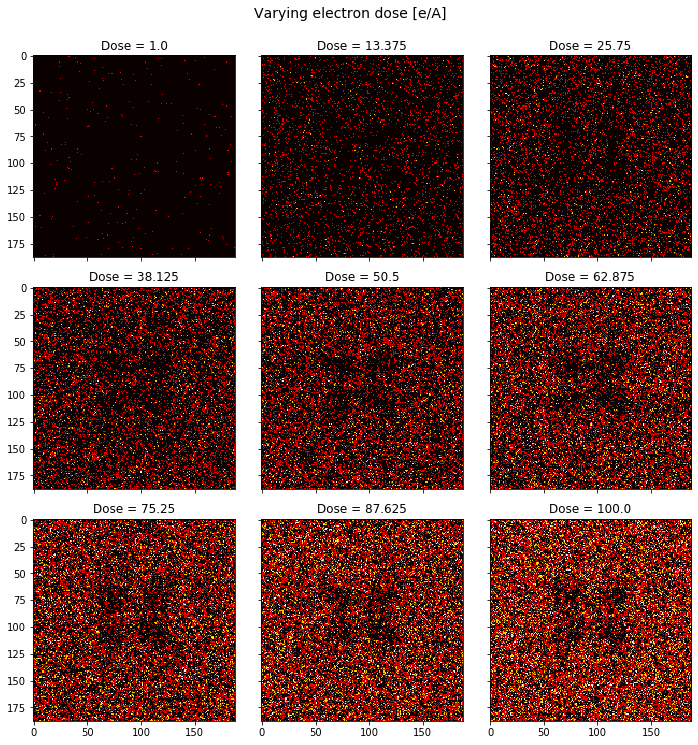

In [262]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10), sharex=True, sharey=True)

# def add_noise(img,dose,pixel_size):
#     dose = 100
#     doseperpixel = dose*(pixel_size[0]*pixel_size[1])
#     mnoise = np.random.poisson(doseperpixel*img)
        
#     return mnoise

dose_values = np.linspace(1, 100, num=9)

for axis, dose in zip(axes.flat, dose_values):
        m = add_noise(ic[3], dose, pixel_size)
        axis.imshow(m, cmap='hot',vmax=3)
        axis.set_title('Dose = {}'.format(dose));
        m=0
fig.suptitle('Varying electron dose [e/A]', fontsize=14, y=1.03)
plt.savefig('results/VaryingDose_20kV_BF.png',dpi=300)
fig.tight_layout()


### Intensity Profile TEM